# Libraries

In [5]:
import matplotlib.pyplot as plt
import h5py    
import numpy as np    
from PIL import Image

# Reading data

In [6]:
train = h5py.File('../data/train.h5','r+')   
test = h5py.File('../data/test.h5','r+')   

In [7]:
X_train = np.array(train.get('train_set_x'))
y_train = np.array(train.get('train_set_y'))
X_test = np.array(test.get('test_set_x'))
y_test = np.array(test.get('test_set_y'))

# Quick glance at the dataset

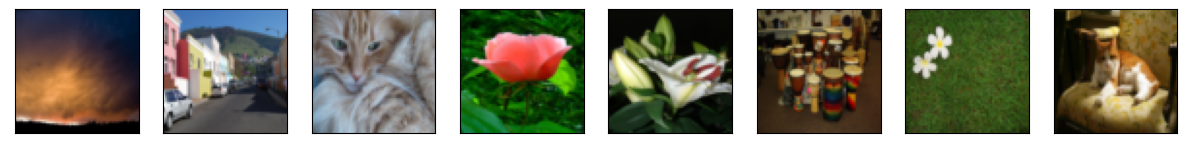

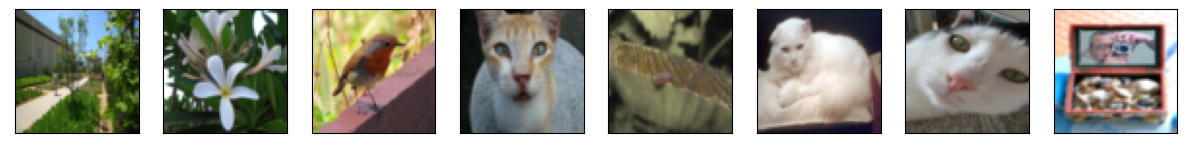

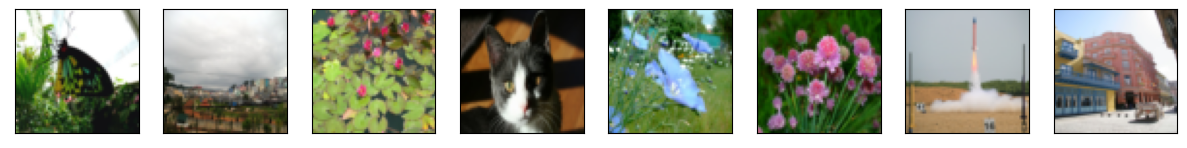

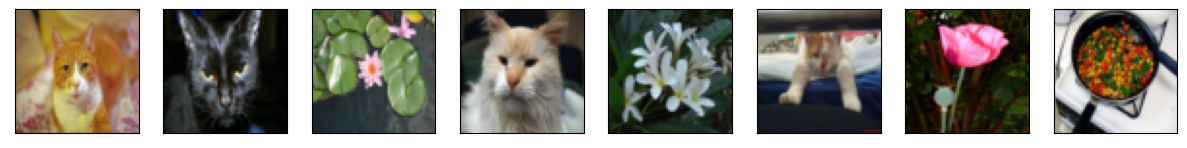

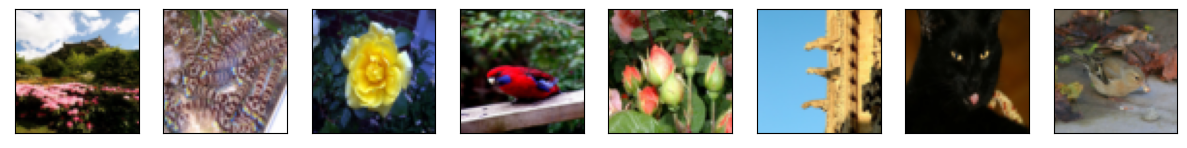

In [8]:
count = 0
for i in range(1,6):
    fig, ax = plt.subplots(1, 8,figsize=(15,15))
    for j in range (1,9):
        image = Image.fromarray(X_train[count])
        ax[j-1].imshow(image)
        ax[j-1].set_xticks([])
        ax[j-1].set_yticks([])
        count += 1
    plt.show()

# Creating the model

In [9]:
def sigmoid(vector):
    return 1/(1+np.exp(vector))

def relu(vector):
    return np.maximum(0,vector)

In [123]:
def compute_layer(nlayer, x, act, W_tensor, B):
    """
    Computes the output of a layer with #i units, using the formula output_i = w_i·input_i + b_i
    
    Args:
    * nlayer (int): integer that stands for the label of the layer.
    * x (np.array #j x 1): The vector x we want to predict from.
    * act (string): the list of the activation functions.
    * W (np.array #i x #j): The matrix containing the weights for each unit. 
    * b (np.array #i x 1): The vector containing the constant for each unit.
    
    Returns:
    * output: vector containing the output
    """
    activation = act[nlayer]
    W = W_tensor[nlayer]
    b = B[nlayer]
    
    if nlayer > 0:s
        if activation == 'relu':
            output = relu(np.matmul(W,compute_layer(nlayer-1,x, act, W_tensor, B))+b)
        elif activation == 'sigmoid':
            output = sigmoid(np.matmul(W,compute_layer(nlayer-1,x, act, W_tensor, B))+b)
        elif activation == 'lineal':
            output = np.matmul(W,compute_layer(nlayer-1,x, act, W_tensor, B))+b
            
    if nlayer == 0:
        output = np.matmul(W,x)+b
    
    return output

In [124]:
def create_neural_network(x, units):
    """
    Computes the output of a layer with #i units, using the formula output_i = w_i·input_i + b_i
    
    Args:
    * x (np.array): The input for the NN
    * units (np.array #i x 1): A list with the number of units per layer.
    
    Returns:
    * W_tensor, B (list, np.array): the tensor of W, and matrix of b
    """
    
    W_tensor = []
    for i,unit in enumerate(units):
        if i == 0:
            W_tensor.append(np.zeros((unit,len(x))))
        elif i > 0:
            W_tensor.append(np.zeros((unit,W_tensor[-1].shape[0])))
        
        
    B = [np.zeros((unit,1)) for unit in units]
    return W_tensor, B

In [147]:
act = ['relu','relu']

x = np.array([[1,2,3]]).T

W_tensor = [
    np.array([[3,1,3],[0,0,0]]), # <----- 1 LAYER
    np.array([[1,1],[-1,5]])     # <----- 2 LAYER
            ]                    # ..............
                                 
B = np.array([
    
            [[4],[3]],     # <----- 1 LAYER
            [[0],[1]]      # <----- 2 LAYER
                         # ..............
            ])



B

In [150]:
W_tensor, B = create_neural_network(x,[2,3])


In [151]:
compute_layer(0,x,act,W_tensor, B)

array([[0.],
       [0.]])